In [84]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

In [186]:
filename_unsat = "/home/cptlab/qaqc-gui_output/Vov2.2_Vtt25_3module_source_scan/module_100026_Vov2.20_Nspe100000_Ncesium200000.hdf5"
filename_sat = "/home/cptlab/qaqc-gui_output/highOVTest/module_100026_Vov4.20_Nspe1000_Nsodium10000.hdf5"

In [354]:
lowestRegistered = []; numSat = []
with h5py.File(filename_sat, "r") as f:
    for channel in range(32):
        arr = pd.DataFrame(f["sodium"][f"ch{channel}"]).to_numpy()
        lowestRegistered.append(np.amin(arr))
        minVals = np.amin(arr.T, axis=0)
        numSat.append(np.count_nonzero(minVals==0))
        

Text(0.5, 1.0, 'Saturation Events for Cesium Source, 200,000 Trigger Events at 2.2 oV')

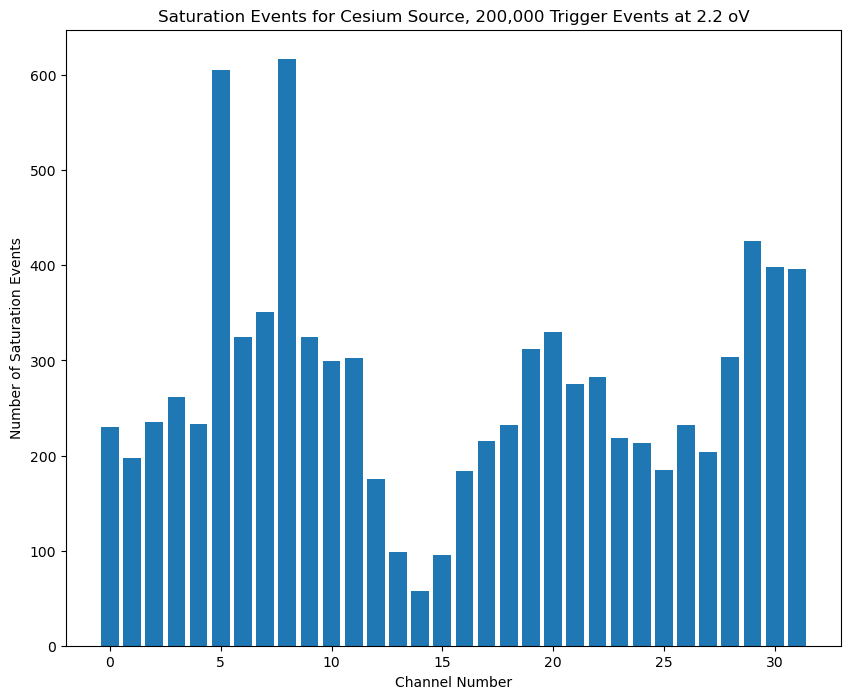

In [356]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(32), np.array(numSat))
plt.xlabel("Channel Number")
plt.ylabel("Number of Saturation Events")
plt.title("Saturation Events for Cesium Source, 200,000 Trigger Events at 2.2 oV")

In [352]:
lowestRegisteredhighOV = []; numSathighOV = []; 
with h5py.File(filename_sat, "r") as f:
    for channel in range(32):
        arr = pd.DataFrame(f["sodium"][f"ch{channel}"]).to_numpy()
        lowestRegisteredhighOV.append(np.amin(arr))
        minVals = np.amin(arr, axis=1)
        print(np.mean(arr[arr<2500]))
        print(len(minVals))
        numSathighOV.append(np.count_nonzero(minVals==0.0))
        

1528.3085
10000
1586.2758
10000
1556.5802
10000
1551.6952
10000
1602.4629
10000
1463.3634
10000
1575.0431
10000
1541.5367
10000
1486.0162
10000
1580.4681
10000
1571.5457
10000
1549.9431
10000
1622.1047
10000
1755.9205
10000
1870.6263
10000
1662.1306
10000
1544.0575
10000
1543.9476
10000
1537.402
10000
1496.9626
10000
1543.1831
10000
1570.2855
10000
1560.7631
10000
1619.4971
10000
1626.0408
10000
1645.2893
10000
1579.5825
10000
1574.7018
10000
1528.9868
10000
1514.2938
10000
1487.1406
10000
1451.4203
10000


Text(0.5, 1.0, 'Saturation Events for Sodium Source, 10,000 Trigger Events at 4.2 oV')

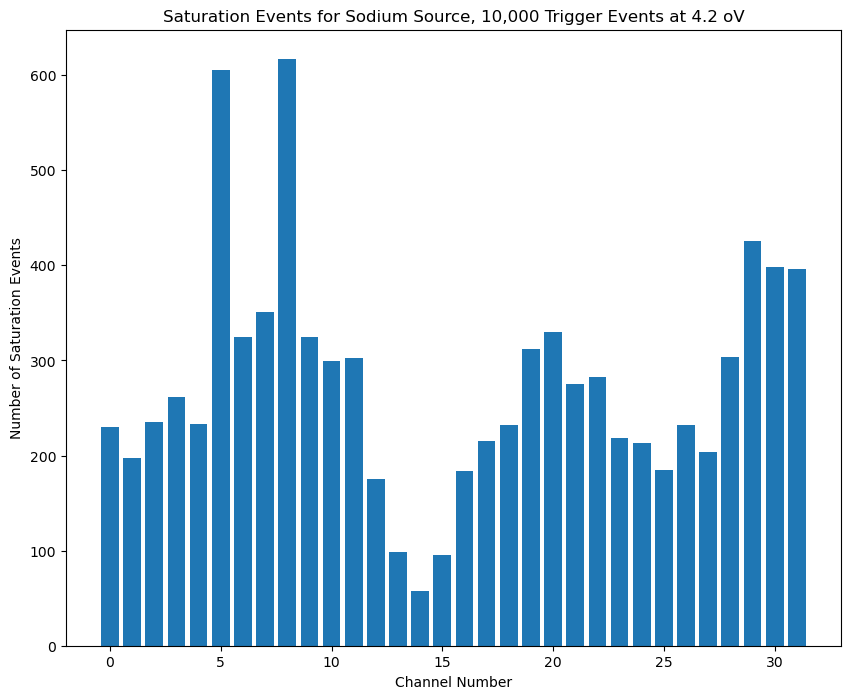

In [353]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(32), numSathighOV)
plt.xlabel("Channel Number")
plt.ylabel("Number of Saturation Events")
plt.title("Saturation Events for Sodium Source, 10,000 Trigger Events at 4.2 oV")

In [ ]:
#average charge per event

In [382]:
with h5py.File(filename_sat, "r") as f:
    print("Keys: %s" % f.keys())
    df = pd.DataFrame(f["sodium"]["ch8"])
    print(df.shape)
    #df[0][0]

Keys: <KeysViewHDF5 ['sodium', 'spe']>
(10000, 1024)


In [383]:
df = df.to_numpy()
print("Lowest Registered Value in Dataframe", np.amin(df))

Lowest Registered Value in Dataframe 0.0


In [384]:
df = df.T

In [385]:
maxAmp = np.amin(df, axis=0)

In [386]:
print(np.amin(maxAmp))

0.0


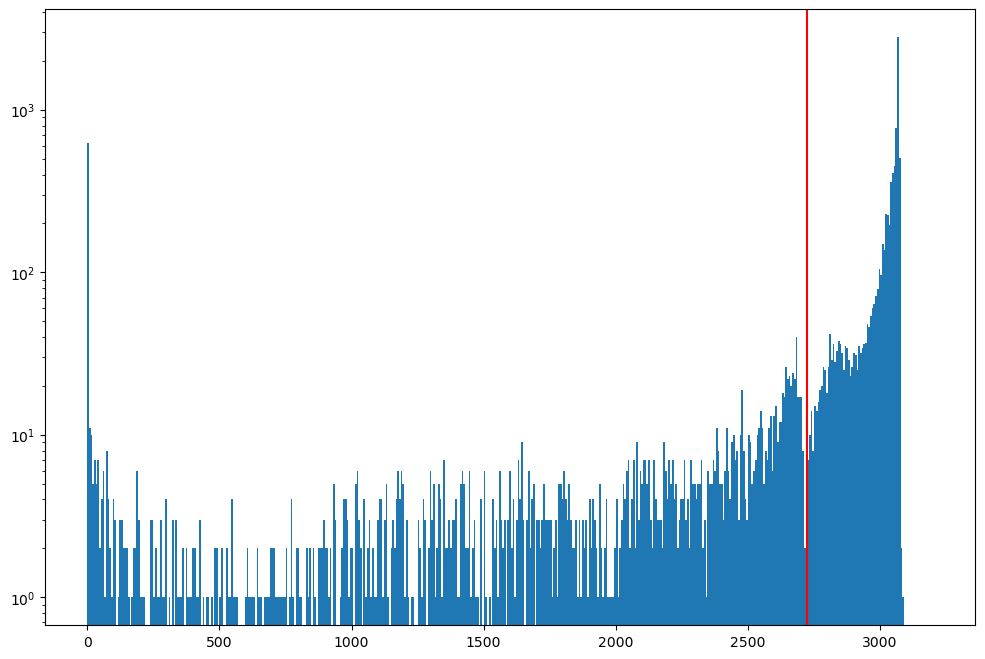

In [387]:
plt.figure(figsize=(12,8))
plt.hist(maxAmp, bins=np.linspace(0, 3200, 500), density=False);
plt.axvline(x=2725, color='r')
plt.yscale("log")

In [388]:
arrTrig = df.T[np.where(np.array(maxAmp)==0)[0]]
print(arrTrig.shape)

(617, 1024)


In [389]:
print(np.amin(arrTrig[0]))

0.0


Text(0, 0.5, 'Waveform Amplifier from Digitizer')

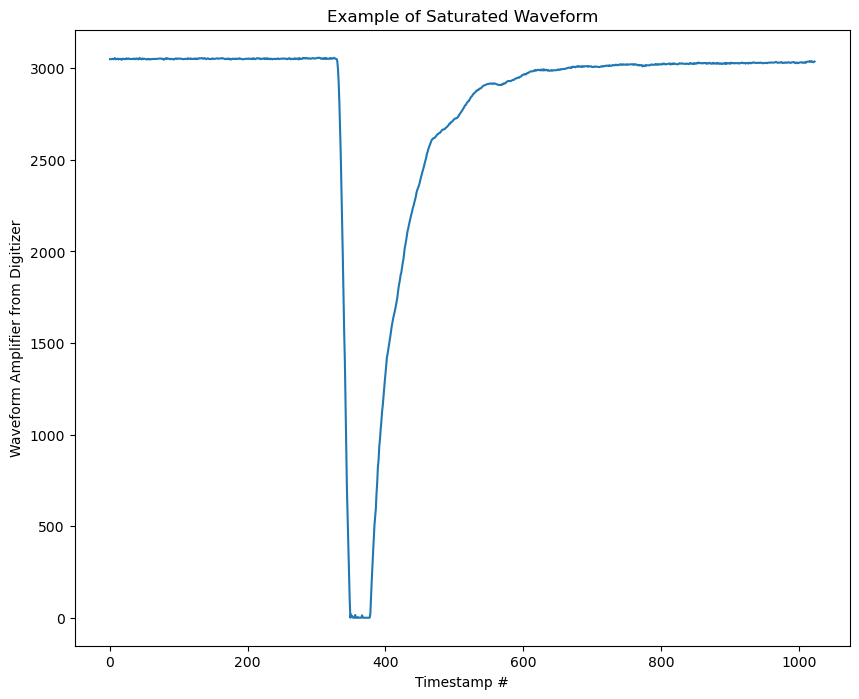

In [392]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1024), arrTrig[0])
plt.title("Example of Saturated Waveform")
plt.xlabel("Timestamp #")
plt.ylabel("Waveform Amplifier from Digitizer")

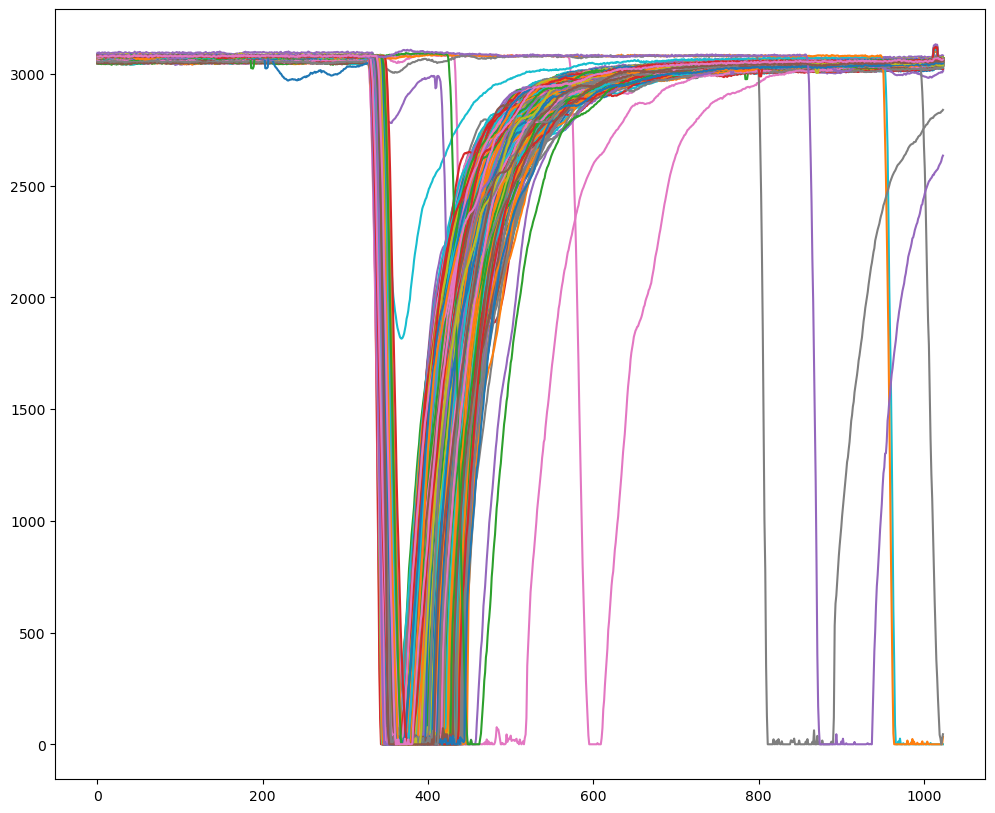

In [391]:
plt.figure(figsize=(12,10))
for i in range(len(arrTrig)):
    plt.plot(np.arange(1024), arrTrig[i])

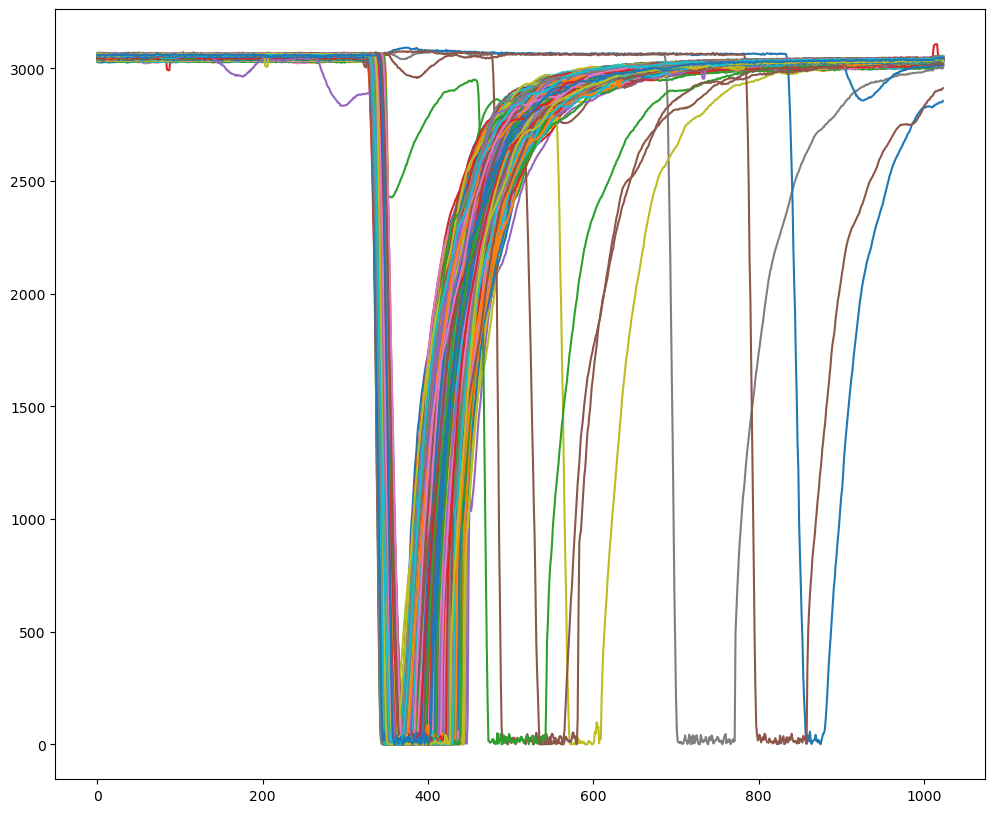

In [381]:
plt.figure(figsize=(12,10))
for i in range(len(arrTrig)):
    plt.plot(np.arange(1024), arrTrig[i])

In [276]:
import sys
sys.path.insert(0, '/home/cptlab/dt5742/python')
from analyze_waveforms import *
with h5py.File(filename_unsat, "r") as f:
    x, y = convert_data(f, "cesium", "ch5", 0, 200000)
    arr = pd.DataFrame(y).to_numpy()


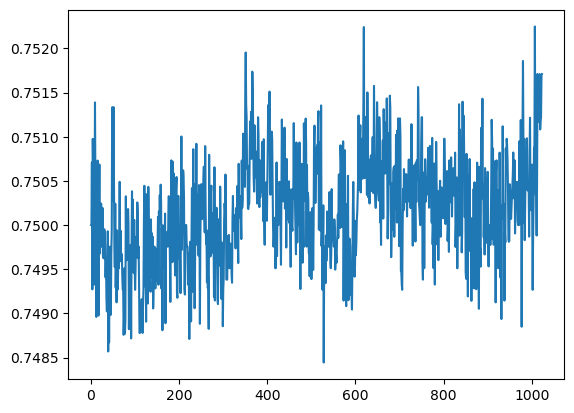

In [277]:
plt.plot(arr[0])

In [275]:
np.amin(arr)

0.0